# DMQC Report: WMO 4901140

## Current status and metadata: 

- APEX float in the North Atlantic, starting off the scotian shelf and ending up in less than 1000m of water near Florida
- Completed 151 cycles from May 2010 to June 2014
- Already in delayed mode, but appears in DOXY audit
- Gain value using raw data is 1.117
- Appears to be 2 gains applied to current adjusted data, 1.126 and 0.902, believe the 0.902 gains are what is flagged in the DOXY audit. 
- SCIENTIFIC_CALIB_COMMENT for some say G obtained from DOXY audit, but for 0.902 gains say calculated using in-air data

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.dates import datestr2num
import matplotlib.pyplot as plt

from pathlib import Path
import numpy as np
import pandas as pd
import bgcArgoDMQC as bgc

wmo = 4901140 # insert WMO number here
bgc.io.get_argo(wmo, local_path=bgc.ARGO_PATH) # download the data to ensure you have up to date files
flt = bgc.sprof(wmo)
flt.clean()
gains = flt.calc_gains(ref='WOA') # calculate gain, can change to ref='NCEP' if in-air data is available


\Users\GordonC\Documents\data\Argo\dac\meds\4901140\4901140_Rtraj.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901140\4901140_Sprof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901140\4901140_meta.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901140\4901140_prof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901140\4901140_tech.nc
Extracting WOA data for Jan
Extracting WOA data for Feb
Extracting WOA data for Mar
Extracting WOA data for Apr
Extracting WOA data for May
Extracting WOA data for Jun
Extracting WOA data for Jul
Extracting WOA data for Aug
Extracting WOA data for Sep
Extracting WOA data for Oct
Extracting WOA data for Nov
Extracting WOA data for Dec
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data -

In [5]:
print(np.nanmean(gains))
print((flt.df.DOXY_ADJUSTED/flt.df.DOXY).unique())

1.117268195077534
[1.126      1.1260002         nan 1.1259999  0.90200007 0.9020001
 0.90199995 0.9020002  0.902      0.9019999  0.9019998  0.90199983
 0.9019997  0.90200025 0.9020003 ]


## DOXY Audit Status

- If the float has any profiles present in the DOXY audit, which are they are why?
- Likely will usually be left empty/deleted

In [8]:
audit_file = list(Path('../../audit/').glob('DOXY_WOA*'))[-1]
df = pd.read_csv(audit_file, sep='\t', header=25)
df = df.loc[df.WMO == wmo]
df['date'] = [datestr2num(t) for t in df['profile date']]
print(df)

     DAC             PI SPROF DATE_UPDATE DATA MODE      WMO  cycle  \
11  meds  Blair Greenan    06/28/22 20:03         D  4901140     12   
12  meds  Blair Greenan    06/28/22 20:03         D  4901140     13   
13  meds  Blair Greenan    06/28/22 20:03         D  4901140     16   
14  meds  Blair Greenan    06/28/22 20:03         D  4901140     20   
15  meds  Blair Greenan    06/28/22 20:03         D  4901140     27   
16  meds  Blair Greenan    06/28/22 20:03         D  4901140     30   
17  meds  Blair Greenan    06/28/22 20:03         D  4901140     33   
18  meds  Blair Greenan    06/28/22 20:03         D  4901140     51   
19  meds  Blair Greenan    06/28/22 20:03         D  4901140     53   
20  meds  Blair Greenan    06/28/22 20:03         D  4901140     64   
21  meds  Blair Greenan    06/28/22 20:03         D  4901140     68   
22  meds  Blair Greenan    06/28/22 20:03         D  4901140     71   
23  meds  Blair Greenan    06/28/22 20:03         D  4901140     84   
24  me

## Visual QC

- Visualize the float and reference surface saturations, as well as the profiles. 
- Observe if DOXY data is set to '3' as it should be or if it is '1' or '2'. 
- Try to note cycles or other identifying features of potentially problematic profiles.

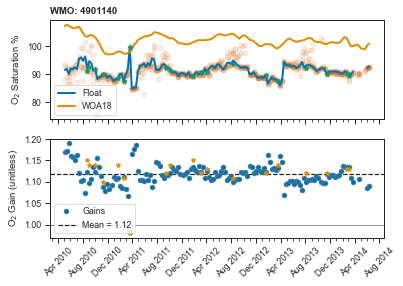

In [9]:
g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(df['date'], df['flt O2 %sat'], '*')
g.axes[1].plot(df['date'], df['WOA G_raw'], '*', zorder=3)
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)

Figure 1: Top panel: Float oxygen percent saturation (blue line) compared to WOA percent saturation (orange line), with DOXY audit flagged cycle percent saturation (green stars, if applicable) and raw float percent saturation (orange circles). Bottom panel: calculated gains (blue dots) and flagged gains from DOXY audit (orange stars).

Notes: 

- The spike in late 2010/early 2011 is suspicious to me, should investigate
- The dramatic change in early 2013 is not as concerning to me. Looking at the float trajectory, it very well could have moved into a different water mass with slightly different chemical properties. Using WOA may be too coarse to capture this, so although it is not reflected in the reference data, I hesitate to mark it as bad. Will still visualize those profiles to investigate further. 

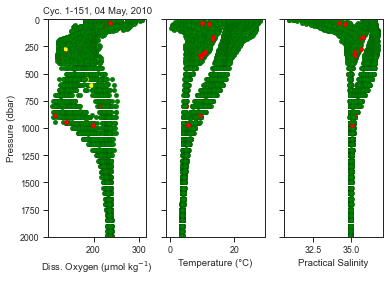

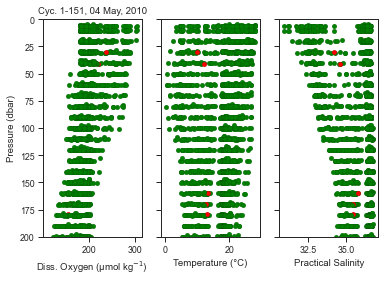

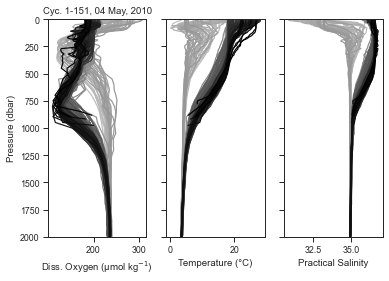

In [11]:
flt.reset()
g = flt.plot('qcprofiles', varlist=['DOXY', 'TEMP', 'PSAL'])
g = flt.plot('qcprofiles', varlist=['DOXY', 'TEMP', 'PSAL'])
g.axes[0].set_ylim((200,0))
g = flt.plot('profiles', varlist=['DOXY', 'TEMP', 'PSAL'])

Figures 2,3: Profiles coloured by QC flag (1-2, green, 3, yellow, 4, red) on difference depth scales.

Notes: [notes on what this figure tells you here] 

## Flag bad data, recalculate gain

- Using the plots above (and likely some more specific plots, made on a case-by-case basis), flag bad DOXY data as 4. 
- After flagging bad data, re-clean the data and re-calculate the gains.

In [ ]:
bad_oxygen = [] # index defining where the oxygen should be flagged as bad
flt.update_field('DOXY_QC', 4, where=bad_oxygen)
flt.update_field('DOXY_ADJUSTED_QC', 4, where=bad_oxygen)
flt.clean()
new_gains = flt.calc_gains(ref='WOA')
print(np.nanmean(new_gains))

g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(df['date'], df['flt O2 %sat'], '*')
g.axes[1].plot(df['date'], df['WOA G_raw'], '*', zorder=3)
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)

Figure x: Repeated gain plot with bad data removed.

## Update Fields and Export

- DOXY should be 3 by default, but many old floats have 1 or 0. Though it will be redundant in some cases, make sure DOXY_QC is not good.
- Apply the gain to calculate DOXY_ADJUSTED. 
- Fill in DOXY_ADJUSTED_ERROR with an appropriate fixed value.
- Fill in DOXY_ADJUSTED_QC. 
- Make sure DOXY_ADJUSTED and DOXY_ADJUSTED_ERROR are `FillValue` wherever DOXY_ADJUSTED_QC is bad.
- Export the D-mode files. During export, HISTORY parameters will be filled as well as SCIENTIFIC_CALIB parameters using some default structures and user info set by calling `bgc.configure.configure()`.

In [ ]:
# make sure DOXY_QC is 3 instead of 0,1,2
flt.update_field('DOXY_QC', 3, where=flt.DOXY_QC.isin([0, 1, 2]))
# apply gain and calculate error
flt.update_field('DOXY_ADJUSTED', flt.gain*flt.DOXY)
flt.update_field('DOXY_ADJUSTED_ERROR', bgc.calc_fixed_doxy_adjusted_error(flt.PSAL, flt.TEMP, flt.PRES))
# fill in DOXY_ADJUSTED_QC appropriately
flt.update_field('DOXY_ADJUSTED_QC', flt.DOXY_QC)
flt.update_field('DOXY_ADJUSTED_QC', 1, where=flt.DOXY_ADJUSTED_QC.isin([0, 3]))
flt.update_field('DOXY_ADJUSTED_QC', 4, where=flt.TEMP_ADJUSTED_QC == 4)
flt.update_field('DOXY_ADJUSTED_QC', 3, where=flt.PSAL_ADJUSTED_QC == 4)
# make sure the data is FillValues where adjusted values are still bad
flt.set_fillvalue('DOXY_ADJUSTED', where=flt.DOXY_ADJUSTED_QC == 4)
flt.set_fillvalue('DOXY_ADJUSTED_ERROR', where=flt.DOXY_ADJUSTED_QC == 4)

In [ ]:
# export the files
flt.export_files(data_mode='D')